In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [11]:
from scipy.stats import chi2_contingency

In [2]:
arsenal_df = pd.read_csv('./arsenal.csv')

In [3]:
arsenal_df.head()

,opponent,venue,season,result,win_percent_before_team1,lose_percent_before_team1,draw_percent_before_team1,win_percent_before_team2,lose_percent_before_team2,draw_percent_before_team2,...,total_lost_goals_before_team2,formation_team1,formation_team2,goals_achieved,goals_lost,date_time,head2head_win_percent,head2head_draw_percent,head2head_lost_percent,is_opponent_big6
0,Sunderland,Away,2000-2001,L,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0,4-3-3,4-3-3,0,1,2000-08-19 00:00:00,0.0,0.0,0.0,0
1,Liverpool,Home,2000-2001,W,0.000000,1.000000,0.00,1.000000,0.000000,0.000000,...,0,4-3-3,4-3-3,2,0,2000-08-21 00:00:00,0.0,0.0,0.0,1
2,Charlton Athletic,Home,2000-2001,W,0.500000,0.500000,0.00,0.500000,0.500000,0.000000,...,3,4-3-3,4-3-3,5,3,2000-08-26 00:00:00,0.0,0.0,0.0,0
3,Chelsea,Away,2000-2001,D,0.666667,0.333333,0.00,0.333333,0.333333,0.333333,...,5,4-3-3,4-3-3,2,2,2000-09-06 00:00:00,0.0,0.0,0.0,1
4,Bradford City,Away,2000-2001,D,0.500000,0.250000,0.25,0.250000,0.500000,0.250000,...,7,4-3-3,4-3-3,1,1,2000-09-09 00:00:00,0.0,0.0,0.0,0


# Feature 'Venue'

In [7]:
arsenal_df['result'].value_counts()

result
W    496
D    200
L    179
Name: count, dtype: int64

### Countplot for Categorical Feature

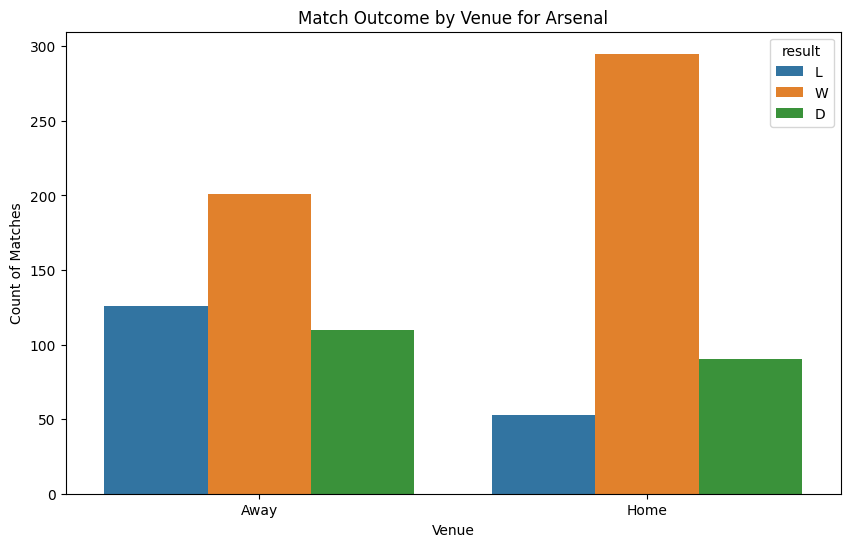

In [6]:
# Plot the count of results by venue
plt.figure(figsize=(10, 6))
sns.countplot(arsenal_df=arsenal_df, x='venue', hue='result')
plt.title('Match Outcome by Venue for Arsenal')
plt.xlabel('Venue')
plt.ylabel('Count of Matches')
plt.show()

### Bar Plot for Proportions

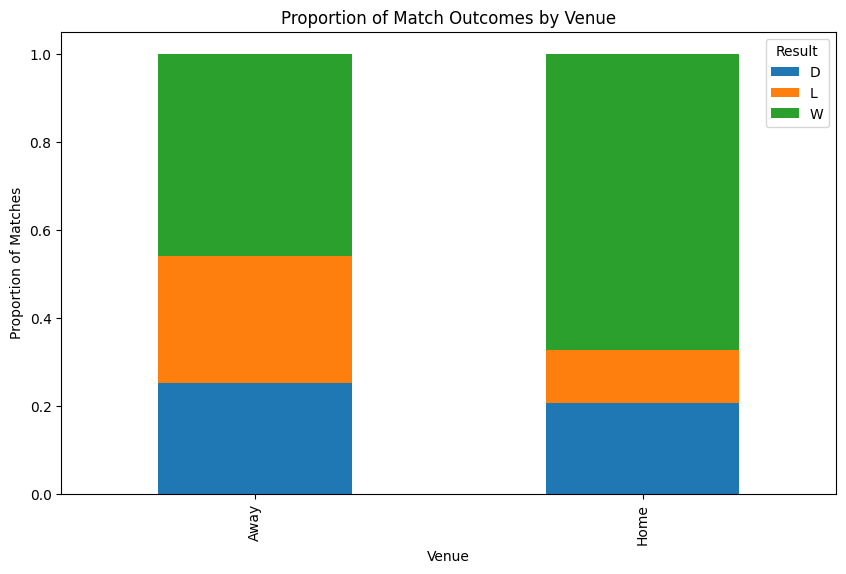

In [9]:
venue_result_proportion = arsenal_df.groupby('venue')['result'].value_counts(normalize=True).unstack()

# Plot the bar plot
venue_result_proportion.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Proportion of Match Outcomes by Venue')
plt.xlabel('Venue')
plt.ylabel('Proportion of Matches')
plt.legend(title='Result')
plt.show()

### Violin Plot

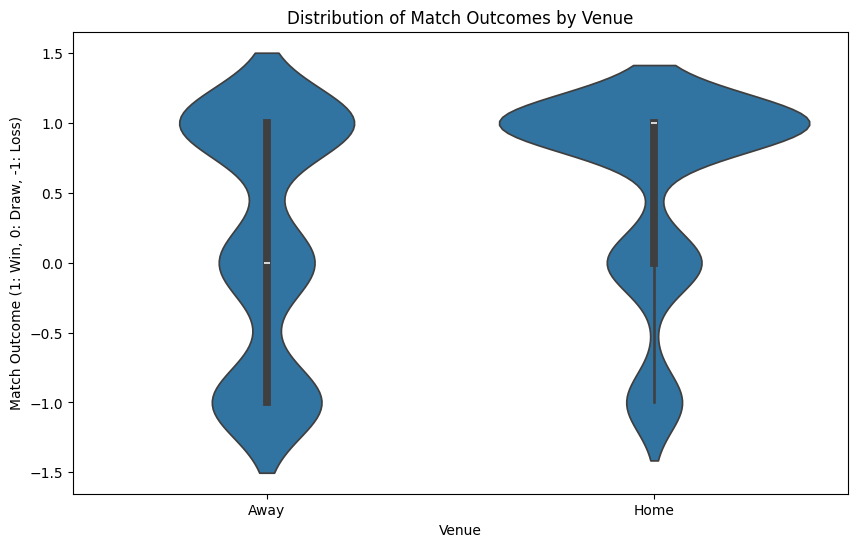

In [10]:
result_map = {'W': 1, 'D': 0, 'L': -1}
arsenal_df['result_numeric'] = arsenal_df['result'].map(result_map)

# Plot the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(arsenal_df=arsenal_df, x='venue', y='result_numeric')
plt.title('Distribution of Match Outcomes by Venue')
plt.xlabel('Venue')
plt.ylabel('Match Outcome (1: Win, 0: Draw, -1: Loss)')
plt.show()

### Chi-Square Test

In [12]:
# Create a contingency table
contingency_table = pd.crosstab(arsenal_df['venue'], arsenal_df['result'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-Square Test Statistic: {chi2}')
print(f'P-Value: {p}')

if p < 0.05:
    print('There is a significant relationship between venue and match result.')
else:
    print('There is no significant relationship between venue and match result.')


Chi-Square Test Statistic: 49.58438775584175
P-Value: 1.7095704583515537e-11
There is a significant relationship between venue and match result.


### Logistic Regression Feature Importance

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Encode categorical variables
label_encoder = LabelEncoder()
arsenal_df['venue_encoded'] = label_encoder.fit_transform(arsenal_df['venue'])
arsenal_df['result_encoded'] = label_encoder.fit_transform(arsenal_df['result'])

# Prepare the features and target variable
X = arsenal_df[['venue_encoded']]  # You can add more features to this list
y = arsenal_df['result_encoded']

# Split the arsenal_df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Get the coefficients
coefficients = model.coef_[0]

print(f'Coefficient for Venue: {coefficients[0]}')

Coefficient for Venue: 0.07006355588088448


# Feature 'win_before_team1'

count    875.000000
mean       0.547295
std        0.253099
min        0.000000
25%        0.400000
50%        0.600000
75%        0.800000
max        1.000000
Name: win_percent_before_team1, dtype: float64


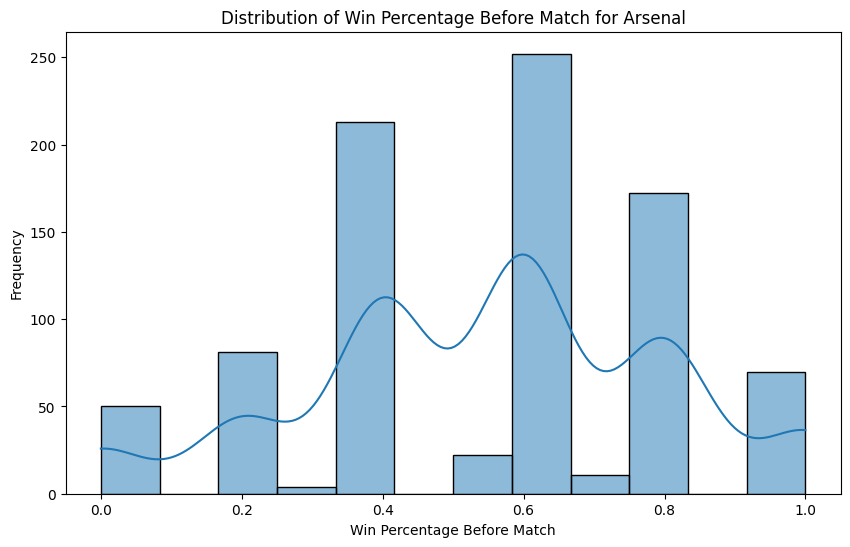

In [17]:
# Summary statistics
print(arsenal_df['win_percent_before_team1'].describe())

# Plot the distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(arsenal_df['win_percent_before_team1'], kde=True)
plt.title('Distribution of Win Percentage Before Match for Arsenal')
plt.xlabel('Win Percentage Before Match')
plt.ylabel('Frequency')
plt.show()

### Boxplot

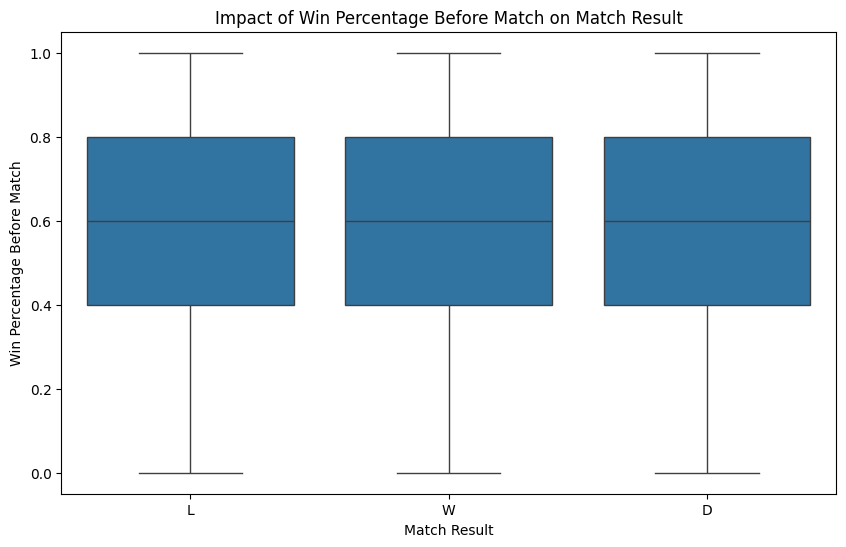

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='result', y='win_percent_before_team1', data=arsenal_df)
plt.title('Impact of Win Percentage Before Match on Match Result')
plt.xlabel('Match Result')
plt.ylabel('Win Percentage Before Match')
plt.show()

### Violin plot

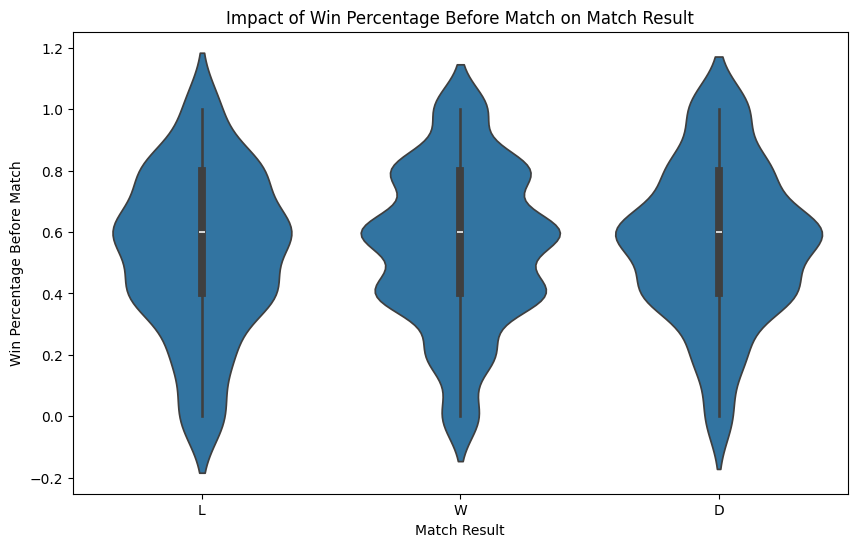

In [20]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='result', y='win_percent_before_team1', data=arsenal_df)
plt.title('Impact of Win Percentage Before Match on Match Result')
plt.xlabel('Match Result')
plt.ylabel('Win Percentage Before Match')
plt.show()

# total_goals_before_team1

In [23]:
arsenal_df['total_goals_before_team1'].value_counts()

total_goals_before_team1
9     119
10     94
8      90
11     85
7      82
12     70
6      66
13     49
5      43
0      30
4      28
14     28
15     23
2      17
3      16
16     12
1      12
17      4
19      4
18      3
Name: count, dtype: int64

count    875.000000
mean       8.755429
std        3.677139
min        0.000000
25%        7.000000
50%        9.000000
75%       11.000000
max       19.000000
Name: total_goals_before_team1, dtype: float64


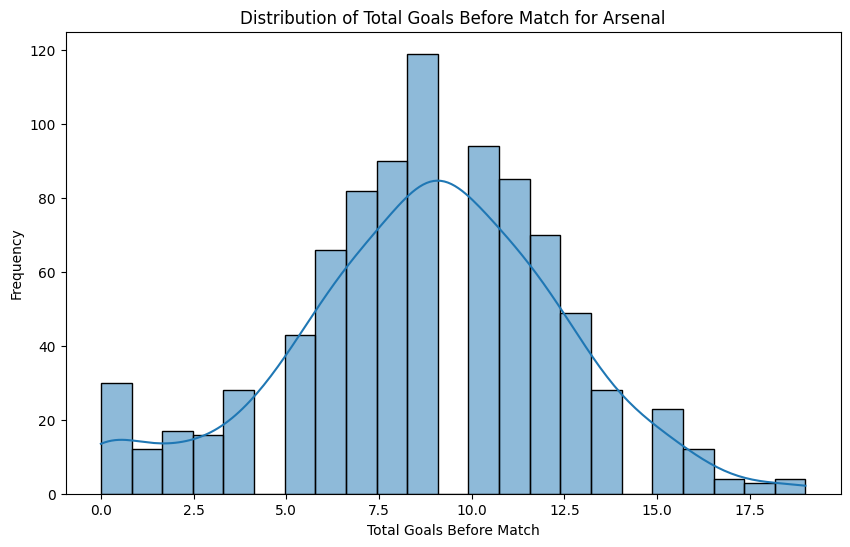

In [22]:
# Summary statistics
print(arsenal_df['total_goals_before_team1'].describe())

# Plot the distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(arsenal_df['total_goals_before_team1'], kde=True)
plt.title('Distribution of Total Goals Before Match for Arsenal')
plt.xlabel('Total Goals Before Match')
plt.ylabel('Frequency')
plt.show()

### Boxlot

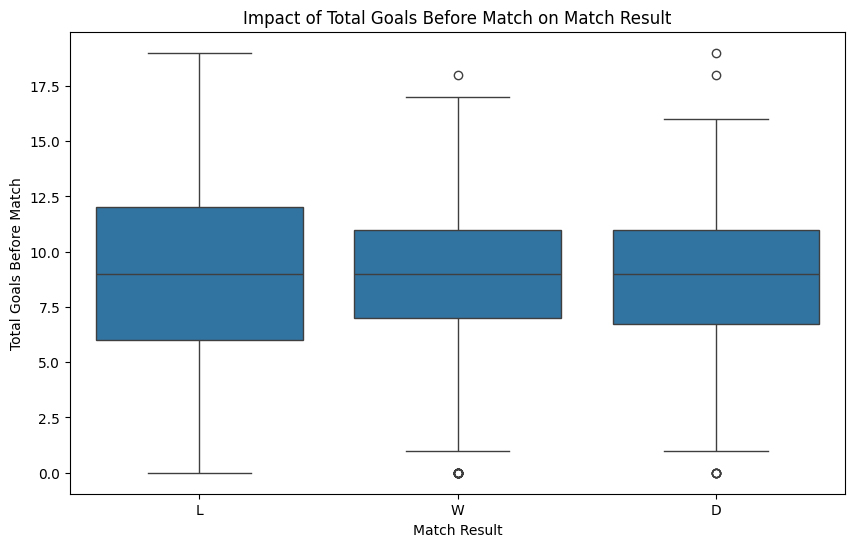

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='result', y='total_goals_before_team1', data=arsenal_df)
plt.title('Impact of Total Goals Before Match on Match Result')
plt.xlabel('Match Result')
plt.ylabel('Total Goals Before Match')
plt.show()

### Violin Plot

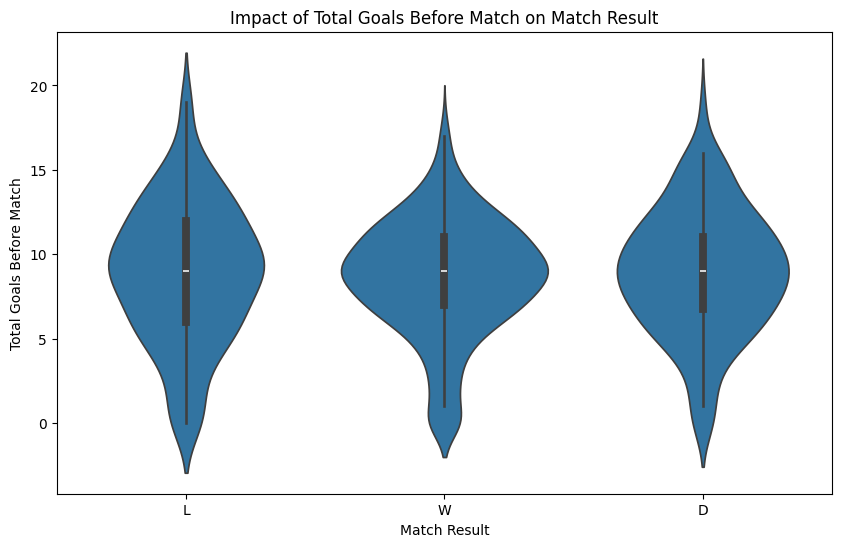

In [26]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='result', y='total_goals_before_team1', data=arsenal_df)
plt.title('Impact of Total Goals Before Match on Match Result')
plt.xlabel('Match Result')
plt.ylabel('Total Goals Before Match')
plt.show()

### Scatterplot with Jitter

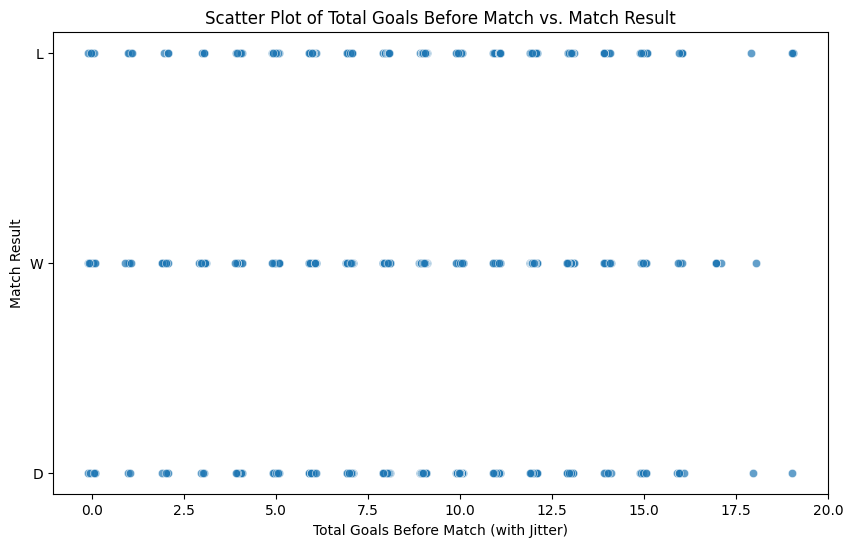

In [28]:
# Add jitter to 'total_goals_before_team1' to avoid overlap
jitter = np.random.uniform(-0.1, 0.1, size=len(arsenal_df))
arsenal_df['total_goals_before_team1_jitter'] = arsenal_df['total_goals_before_team1'] + jitter

plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_goals_before_team1_jitter', y='result', data=arsenal_df, alpha=0.7)
plt.title('Scatter Plot of Total Goals Before Match vs. Match Result')
plt.xlabel('Total Goals Before Match (with Jitter)')
plt.ylabel('Match Result')
plt.show()

### Pair plot

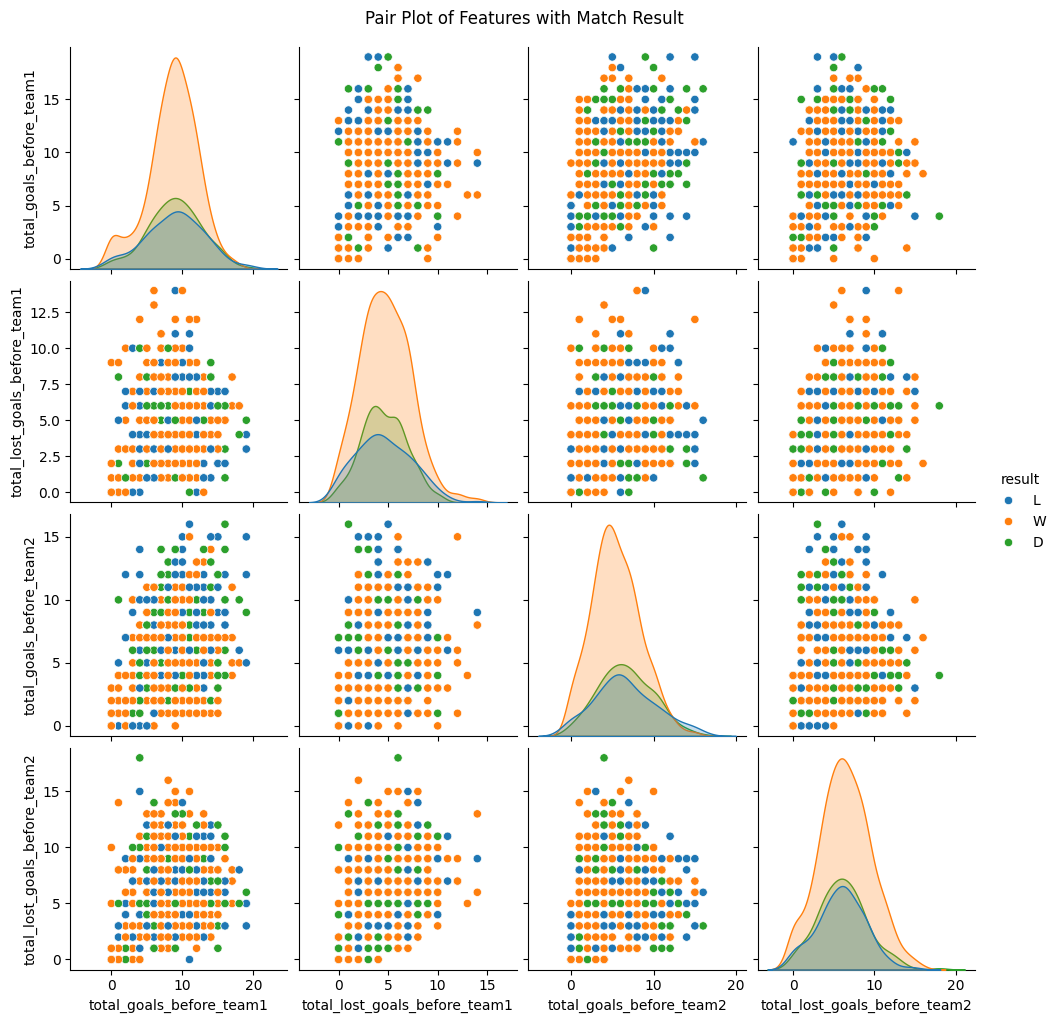

In [30]:
sns.pairplot(arsenal_df, hue='result', vars=['total_goals_before_team1', 'total_lost_goals_before_team1', 'total_goals_before_team2', 'total_lost_goals_before_team2'])
plt.suptitle('Pair Plot of Features with Match Result', y=1.02)
plt.show()

### Heatmap of Correlation Matrix

In [31]:
correlation_matrix = arsenal_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Feature Correlations')
plt.show()

ValueError: could not convert string to float: 'Sunderland'

### Conditional Density plot

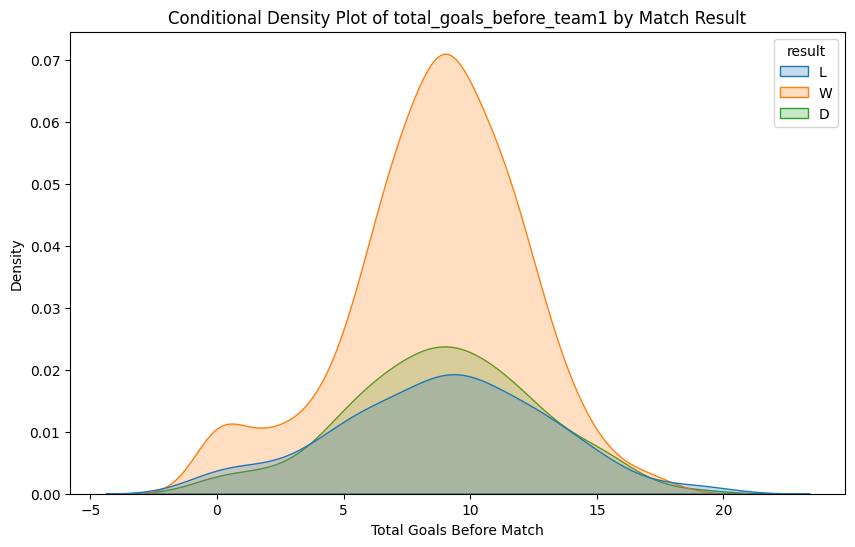

In [33]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=arsenal_df, x='total_goals_before_team1', hue='result', fill=True)
plt.title('Conditional Density Plot of total_goals_before_team1 by Match Result')
plt.xlabel('Total Goals Before Match')
plt.ylabel('Density')
plt.show()

### Strip plot

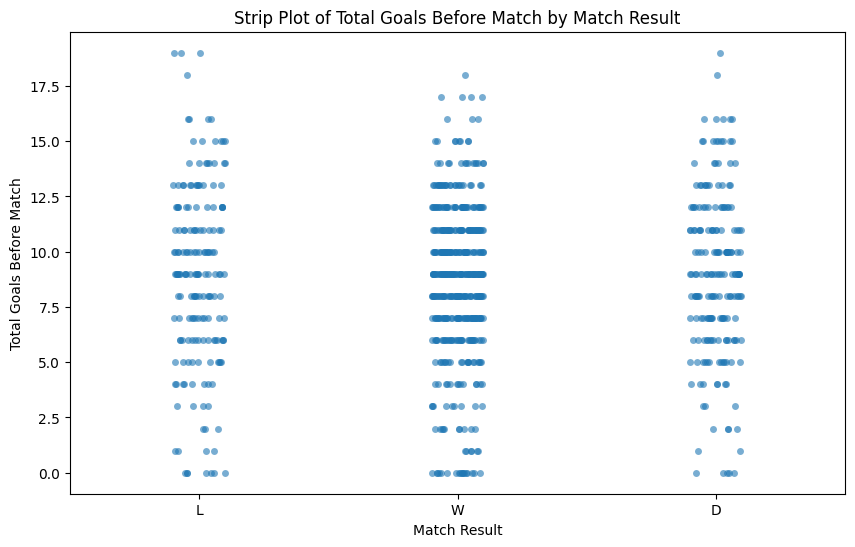

In [34]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='result', y='total_goals_before_team1', data=arsenal_df, jitter=True, alpha=0.6)
plt.title('Strip Plot of Total Goals Before Match by Match Result')
plt.xlabel('Match Result')
plt.ylabel('Total Goals Before Match')
plt.show()

### Swarm plot

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 19.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 32.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


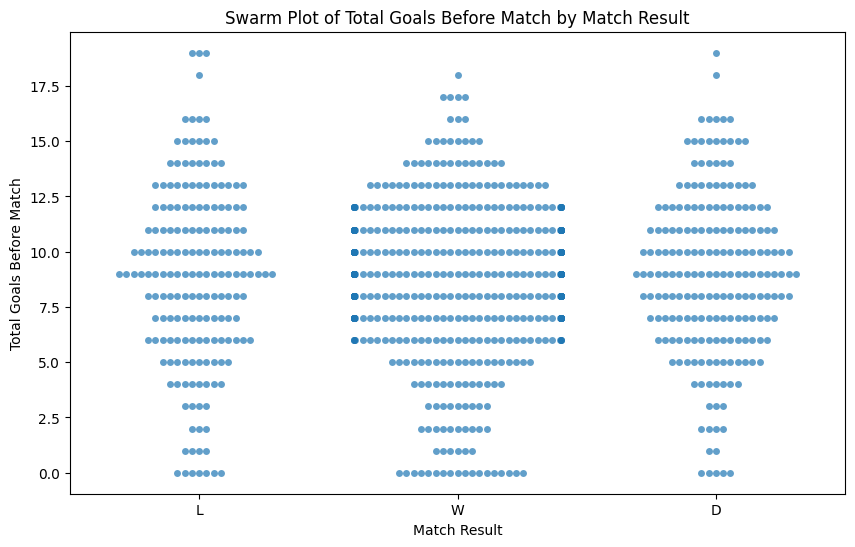

In [35]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='result', y='total_goals_before_team1', data=arsenal_df, alpha=0.7)
plt.title('Swarm Plot of Total Goals Before Match by Match Result')
plt.xlabel('Match Result')
plt.ylabel('Total Goals Before Match')
plt.show()

### Facet Grid

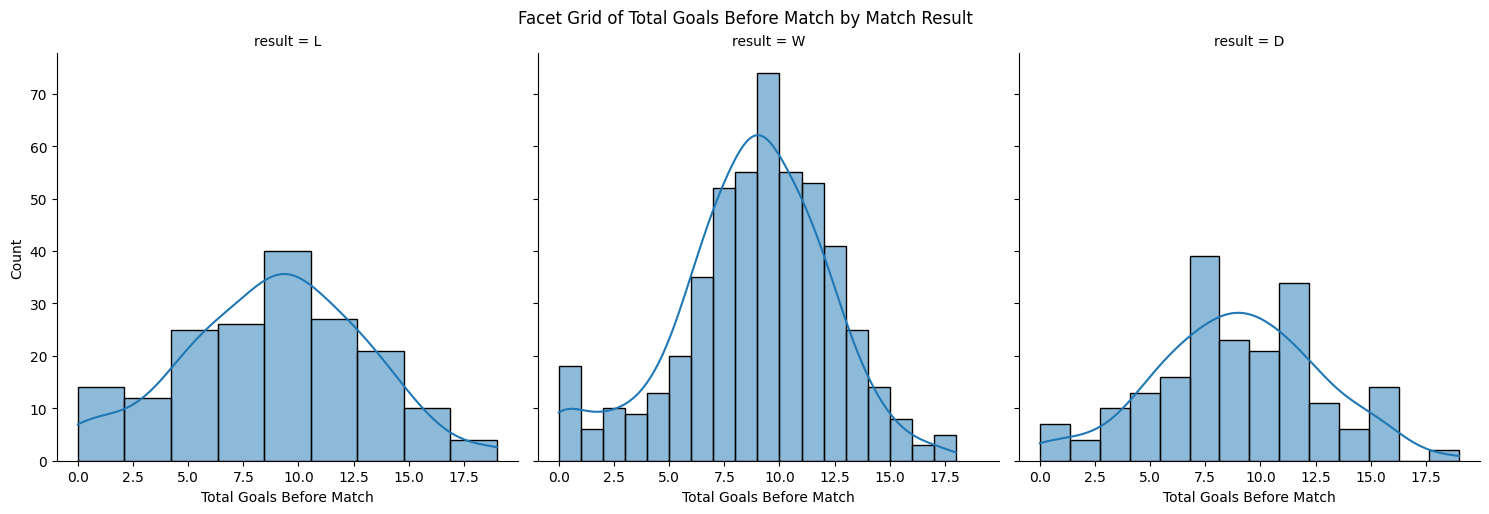

In [36]:
g = sns.FacetGrid(arsenal_df, col='result', height=5, aspect=1)
g.map(sns.histplot, 'total_goals_before_team1', kde=True)
g.fig.suptitle('Facet Grid of Total Goals Before Match by Match Result', y=1.02)
g.set_axis_labels('Total Goals Before Match', 'Count')
plt.show()

### Boxen plot

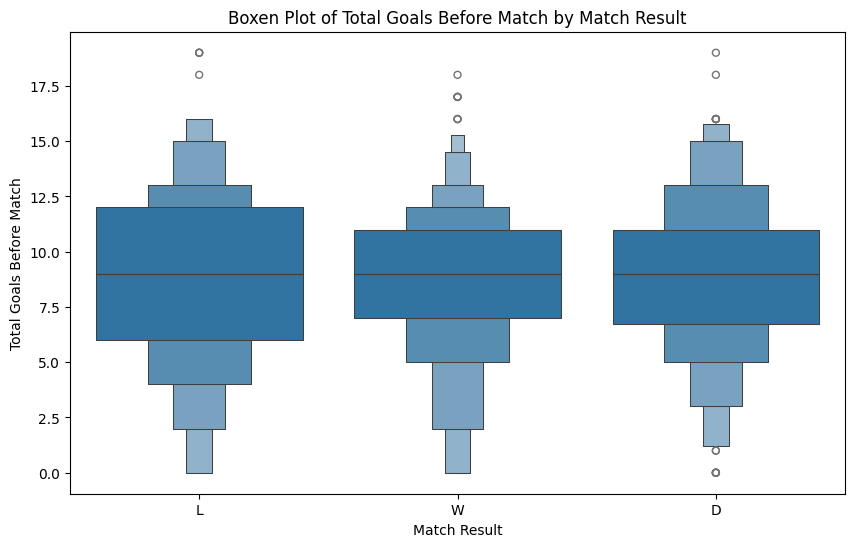

In [38]:
plt.figure(figsize=(10, 6))
sns.boxenplot(x='result', y='total_goals_before_team1', data=arsenal_df)
plt.title('Boxen Plot of Total Goals Before Match by Match Result')
plt.xlabel('Match Result')
plt.ylabel('Total Goals Before Match')
plt.show()